In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
import torch
from torchvision.transforms.functional import gaussian_blur
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
device = torch.device('cuda')

In [ ]:
# #this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
# def gaussian_filter_density(gt):
#     print (gt.shape)
#     density = torch.zeros(gt.shape, device = device, dtype = torch.float)
#     gt_count = torch.count_nonzero(gt)
#     if gt_count == 0:
#         return density

#     pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
#     leafsize = 2048
#     # build kdtree
#     tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
#     # query kdtree
#     distances, locations = tree.query(pts, k=4)
#     print('distance = ',distances, 'lokacije = ',locations)

#     print ('generate density...')
#     for i, pt in enumerate(pts):
#         pt2d = torch.zeros(gt.shape, dtype=torch.float32,device = device)
#         pt2d[pt[1],pt[0]] = 1.
#         if gt_count > 1:
#             sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
#             print(sigma)
#         else:
#             sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point

#         density += GaussianBlur(pt2d, sigma)
#     print ('done.')
#     return density

In [4]:
#set the root to the Shanghai dataset you download
root = '/content/drive/MyDrive/MATF/Shanghai_data'

In [8]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train, part_A_test]

In [9]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [10]:
size = len(img_paths)
for img_path in img_paths:

    print (size)
    size -= 1

    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = torch.zeros((img.shape[1],img.shape[0]),device = device)
    gt = mat["image_info"][0,0][0,0][0] #ovo je numpy sada
    gt2 = gt.copy()
    count_removed = 0
    for i in range(0,len(gt)):
        if int(gt[i][0])<img.shape[0] and int(gt[i][0]) >= 0  and int(gt[i][1])<img.shape[1] and int(gt[i][1]) >= 0:
          k[int(gt[i][1]),int(gt[i][0])]=1
        else:
          gt2 = np.delete(gt2, i - count_removed, 0)
          count_removed += 1





    # k = gaussian_filter_density(k)

    print (k.shape[0],k.shape[1])
    density = torch.zeros(k.shape, device = device, dtype = torch.float)
    gt_count = len(gt2)
    if gt_count == 0:
        k = density

    else:

      # pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))) pts = gt
      leafsize = 2048
      # build kdtree
      tree = scipy.spatial.KDTree(gt2.copy(), leafsize=leafsize)
      # query kdtree
      distances, locations = tree.query(gt2.copy(), k=4)

      print ('generate density...')

      for i, pt in enumerate(gt2):
          pt2d = torch.zeros(k.shape, dtype=torch.float32, device =device)
          pt2d[int(pt[1])-1,int(pt[0])-1] = 1.
          if gt_count > 1:
              sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
          else:
              sigma = np.average(np.array(k.shape))/2./2. #case: 1 point zasto?? TODO
          matrix4d = pt2d.unsqueeze(0).unsqueeze(0)


          kernel_size = 2 * round(3.14 * sigma) + 1
          res = gaussian_blur(matrix4d, kernel_size,sigma) #
          density += res.squeeze(0).squeeze(0)
      print ('done.')
      k = density

    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k.cpu()


482
1024 686
generate density...
done.
481
1024 654
generate density...
done.
480
1024 683
generate density...
done.
479
1024 768
generate density...
done.
478
400 400
generate density...
done.
477
1024 768
generate density...
done.
476
1024 768
generate density...
done.
475
1024 498
generate density...
done.
474
1024 768
generate density...
done.
473
1024 675
generate density...
done.
472
540 405
generate density...
done.
471
1024 767
generate density...
done.
470
1024 681
generate density...
done.
469
800 517
generate density...
done.
468
990 632
generate density...
done.
467
1024 768
generate density...
done.
466
1024 680
generate density...
done.
465
500 375
generate density...
done.
464
1024 683
generate density...
done.
463
600 390
generate density...
done.
462
998 689
generate density...
done.
461
1024 768
generate density...
done.
460
1024 576
generate density...
done.
459
1024 747
generate density...
done.
458
849 565
generate density...
done.
457
390 498
generate density...
d

KeyboardInterrupt: 

In [ ]:
# ## ovo ovde radi ++ filteri da se pogledaju

# img_path = img_paths[45]
# mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
# img= plt.imread(img_path)
# k = torch.zeros((img.shape[0],img.shape[1]),device = device)
# gt = mat["image_info"][0,0][0,0][0] #ovo je numpy sada
# gt2 = gt.copy()
# count_removed = 0
# for i in range(0,len(gt)):
#     if int(gt[i][0])<=k.shape[1]  and int(gt[i][1])<=k.shape[0]: #and int(gt[i][1]) >= 0 and int(gt[i][0]) >= 0:
#       k[int(gt[i][1]),int(gt[i][0])]=1
#     else:
#       gt2 = np.delete(gt2, i - count_removed, 0)
#       count_removed += 1





# # k = gaussian_filter_density(k)


# k = torch.tensor([[1, 1, 1, 0, 0, 0],
#               [1, 1, 1, 0, 0, 0],
#               [1, 1, 1, 0, 0, 0],
#               [0, 0, 0, 1, 1, 1],
#               [0, 0, 0, 0, 0, 0]], dtype= torch.float32)


# # print (k.shape[0],k.shape[1])
# # density = torch.zeros(k.shape, device = device, dtype = torch.float)
# # gt_count = len(gt2)
# # if gt_count == 0:
# #     k = density


# # else:

#   # pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))) pts = gt
#   leafsize = 2048
#   # build kdtree
#   tree = scipy.spatial.KDTree(gt2.copy(), leafsize=leafsize)
#   # query kdtree
#   distances, locations = tree.query(gt2.copy(), k=4)

#   print ('generate density...')

#   for i, pt in enumerate(gt2):
#       pt2d = torch.zeros(k.shape, dtype=torch.float32, device =device)
#       pt2d[int(pt[1])-1,int(pt[0])-1] = 1.
#       if gt_count > 1:
#           sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
#       else:
#           sigma = np.average(np.array(k.shape))/2./2. #case: 1 point zasto?? TODO
#       matrix4d = pt2d.unsqueeze(0).unsqueeze(0)

#       print('sigma ', sigma)
#       res = gaussian_blur(matrix4d, (31,31), (sigma, sigma)) #
#       density += res.squeeze(0).squeeze(0)
#   print ('done.')
#   k = density

# # with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
# #         hf['density'] = k.cpu()
# #         plt.imshow(k.cpu())




50

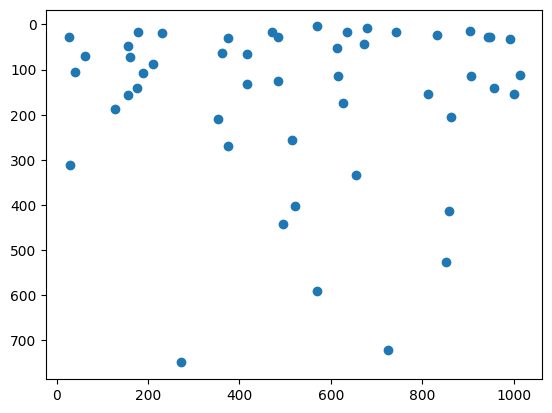

In [ ]:
plt.gca().invert_yaxis()
plt.scatter(gt[:,0], gt[:,1])
len(gt)

In [ ]:
img_path = img_paths[45]
img= plt.imread(img_path)
plt.imshow(img)

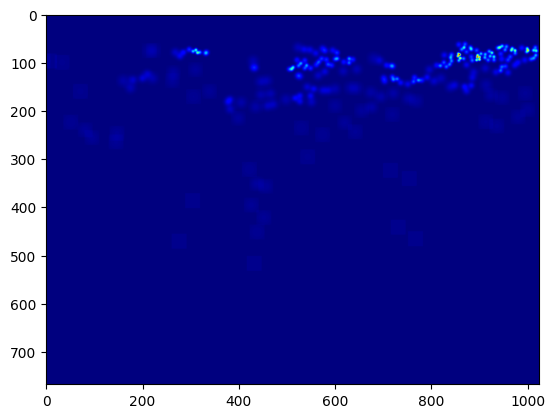

In [ ]:
gt_file = h5py.File(img_paths[45].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
np.sum(groundtruth)